In [2]:
import itertools
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
from math import *
import scipy
from tqdm import tqdm

from utils import *
from ODE_utils import *
# from ODE_lag_utils import *

import matplotlib as mpl
import pandas as pd
import multiprocessing

# Set the default font and size
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 16

In [3]:
R = 4
path = "../data/ecol_adv_no_lag"
path_alt = "../data/seq_vs_co_Npool"
rhos = np.linspace(0, 0.8, 101)[:60]

frac_diaux_pair = []
for rho in tqdm(rhos):
    data = pickle.load(open(os.path.join(path, f"pairwise_rho={rho}.pkl"), "rb"))
    basic = data["basic"]
    D, gC, Nseq, Ncout = basic["D"], basic["gC"], basic["Nseq"], basic["Ncout"]
    states = data["end"]["states"]
    ids = [i["ids"] for i in states]
    ids_list = sum(ids, [])
    frac_diaux_pair.append(len([i for i in ids_list if i<Nseq])/len(ids_list)-0.05)

N_use = 5
frac_diaux_5 = []
div_5 = []
for rho in tqdm(rhos):
    data = pickle.load(open(os.path.join(path_alt, f"N_use={N_use}_rho={rho}.pkl"), "rb"))
    states = data["end"]["states"]
    Nseq = data["basic"]["Nseq"]
    ids = [i["ids"] for i in states]
    N_seq = N_use
    ids_list = sum(ids, [])
    frac_diaux_5.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
    div_5.append(np.mean([len(i) for i in ids]))

N_use = 50
frac_diaux_50 = []
div_50 = []
for rho in tqdm(rhos):
    data = pickle.load(open(os.path.join(path_alt, f"N_use={N_use}_rho={rho}.pkl"), "rb"))
    states = data["end"]["states"]
    Nseq = data["basic"]["Nseq"]
    ids = [i["ids"] for i in states]
    N_seq = N_use
    ids_list = sum(ids, [])
    frac_diaux_50.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
    div_50.append(np.mean([len(i) for i in ids]))

frac_diaux = []
div = []
for rho in tqdm(rhos):
    data = pickle.load(open(os.path.join(path, f"full_rho={rho}.pkl"), "rb"))
    states = data["end"]["states"]
    Nseq = data["basic"]["Nseq"]
    ids = [i["ids"] for i in states]
    ids_list = sum(ids, [])
    frac_diaux.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
    div.append(np.mean([len(i) for i in ids]))

100%|██████████| 60/60 [02:56<00:00,  2.94s/it]


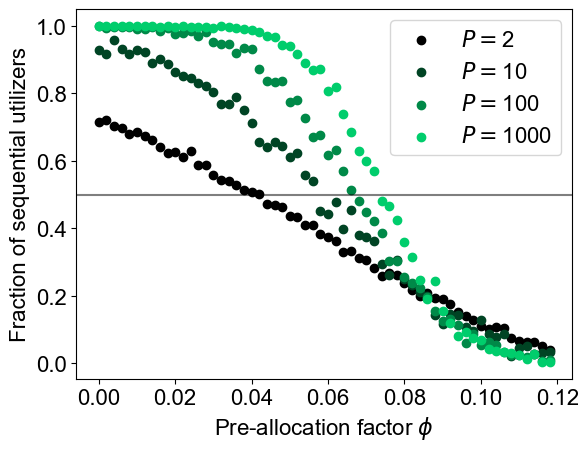

In [4]:
from scipy.optimize import fsolve
import matplotlib.colors as mcolors

def interpolate_colors(color1, color2, k):
    """Generate a list of colors interpolating between two hex colors."""
    rgb1 = mcolors.hex2color(color1)
    rgb2 = mcolors.hex2color(color2)
    # Interpolate colors
    interpolated_colors = [
        mcolors.to_hex([(1 - t) * c1 + t * c2 for c1, c2 in zip(rgb1, rgb2)])
        for t in [i / (k - 1) for i in range(k)]
    ]
    return interpolated_colors

Nlist = [2, 10, 100, 1000]
y_list = [frac_diaux_pair, frac_diaux_5, frac_diaux_50, frac_diaux]
color_list = interpolate_colors("#000000", "#00CD6C", len(Nlist))

Nlist = Nlist
y_list = y_list
color_list = color_list

root_list = []
for i in range(len(y_list)):
    plt.scatter([i/R for i in rhos], y_list[i], color=color_list[i], marker="o", label="$P=$"+f"{Nlist[i]}")
plt.axhline(0.5, color="k", alpha=0.5)
plt.xlabel("Pre-allocation factor $\phi$")
plt.ylabel("Fraction of sequential utilizers")
plt.legend(loc='upper right')
plt.savefig("../figures/supp_community_effect.pdf", bbox_inches="tight")

In [20]:
frac_diaux_50

[]